In [1]:
import numpy as np
import raster_tools as rt
import rasterio
from shapely import geometry

import matplotlib.pyplot as plt
import raster_tiler
import fiona

In [2]:
src, rast = rt.readTiff("straßen.tif")
band1 = rast[0]

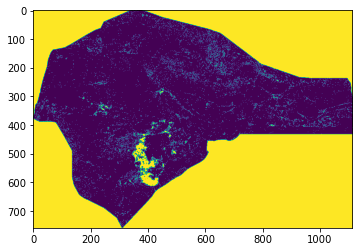

In [3]:
plt.imshow(band1)

In [4]:
rast_tiles = raster_tiler.Tiles(band1, src.bounds)
rast_tiles = rast_tiles.tileception()
rast_tiles = rast_tiles.tileception()
rast_tiles = rast_tiles.tileception()

In [5]:
layer = fiona.open('straßen.geojson', 'r')
collection = [geometry.shape(item["geometry"]) for item in layer]
#collection = geometry.GeometryCollection(collection)

In [12]:
result = rast_tiles.vector_intersects(collection)

In [14]:
result = rast_tiles.recompose()

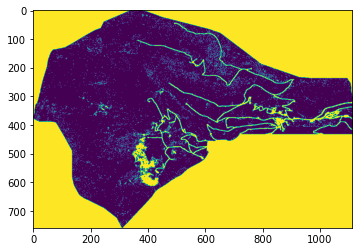

In [11]:
plt.imshow(rast_tiles.recompose())

In [15]:
profile = src.profile
profile.update(dtype=np.float32,count=1)
with rasterio.open("result.tif","w+",**src.profile) as dst:
    dst.write(result.astype(np.float32),1)

In [7]:

"""
for tile in rast_tiles.tiles:
    for geom in collection:
        if tile.intersects(geom):

            tile_rasts = tile.tiles
            tile_rect = tile.tile_rectangles
            tile_bounds = tile.boundaries

            for rast, rec, bound in zip(tile_rasts, tile_rect,tile_bounds):
                for geom in collection:
                    if rec.intersects(geom):
                        for i,j in np.ndindex(rast.shape):
                            if raster_tiler.pixel_as_polygon((i,j),rast.shape,bound):
                                rast[i,j] = 1   

"""

'\nfor tile in rast_tiles.tiles:\n    for geom in collection:\n        if tile.intersects(geom):\n\n            tile_rasts = tile.tiles\n            tile_rect = tile.tile_rectangles\n            tile_bounds = tile.boundaries\n\n            for rast, rec, bound in zip(tile_rasts, tile_rect,tile_bounds):\n                for geom in collection:\n                    if rec.intersects(geom):\n                        for i,j in np.ndindex(rast.shape):\n                            if raster_tiler.pixel_as_polygon((i,j),rast.shape,bound):\n                                rast[i,j] = 1   \n\n'